In [2]:
import pandas
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
liquor = pandas.read_csv('C:\\Users\\shiva\\Desktop\\DPA\\new_liquor_clean_final.csv')

In [17]:
liquor = liquor.drop(['Unnamed: 0','X'],axis = 1)

In [18]:
len(liquor)

1048575

In [19]:
liquor['Date'] = pandas.to_datetime(liquor['Date'])

In [20]:
liquor = liquor[['Date','Store_Number','County','Vendor_Name','Pack','Bottle_Volume_ml','State_Bottle_Cost','State_Bottle_Retail','Bottles_Sold','Sale_Dollars','Volume_Sold_Litres','AchoholTypes']]

In [21]:
liquor['Year'] = liquor['Date'].apply(lambda time: time.year)

In [22]:
liquor_2016 = liquor[liquor['Year']==2016]

In [23]:
liquor_2016.corr()

,Store_Number,Pack,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Litres,Year
Store_Number,1.000000,0.057381,-0.000907,-0.009031,-0.009030,-0.014573,-0.035464,-0.027119,NaN
Pack,0.057381,1.000000,-0.087271,-0.083464,-0.083466,0.077964,-0.081486,-0.113510,NaN
Bottle_Volume_ml,-0.000907,-0.087271,1.000000,0.994089,0.994088,-0.003627,0.219910,0.269690,NaN
State_Bottle_Cost,-0.009031,-0.083464,0.994089,1.000000,1.000000,-0.005040,0.229752,0.262727,NaN
State_Bottle_Retail,-0.009030,-0.083466,0.994088,1.000000,1.000000,-0.005038,0.229757,0.262730,NaN
Bottles_Sold,-0.014573,0.077964,-0.003627,-0.005040,-0.005038,1.000000,0.891761,0.867859,NaN
Sale_Dollars,-0.035464,-0.081486,0.219910,0.229752,0.229757,0.891761,1.000000,0.928949,NaN
Volume_Sold_Litres,-0.027119,-0.113510,0.269690,0.262727,0.262730,0.867859,0.928949,1.000000,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


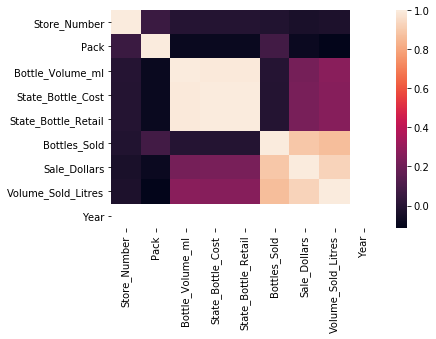

In [24]:
sns.heatmap(liquor_2016.corr())

We can see 'Volume_Sold_Litres' has a very high correlation with 'Sale_Dollars' and hence it is selected as on of the first parameters to prdict 'Sale_Dollars'. 

In [ ]:
# Get County wise sales for 2016
liquor_2016_County_volume = liquor_2016.groupby(['County'])['Volume_Sold_Litres'].sum().to_frame().sort_values('Volume_Sold_Litres', ascending=0)

# resetting the index
liquor_2016_County_volume['County'] = liquor_2016_County_volume.index

liquor_2016_County_volume.index = range(0, len(liquor_2016_County_volume))

In [33]:
liquor_2016_County_volume.head()

,Volume_Sold_Litres,County
0,189361.95,Polk
1,88911.80,Linn
2,69781.39,Scott
3,56649.79,Johnson
4,54297.16,Black Hawk


In [27]:
liquor_2016_County_sales = liquor_2016.groupby(['County'])['Sale_Dollars'].sum().to_frame().sort_values('Sale_Dollars', ascending=0)

# resetting the index
liquor_2016_County_sales['County'] = liquor_2016_County_sales.index

liquor_2016_County_sales.index = range(0, len(liquor_2016_County_sales))

In [34]:
liquor_2016_County_sales.head()

,Sale_Dollars,County
0,3.474311e+06,Polk
1,1.474663e+06,Linn
2,1.128010e+06,Scott
3,1.011385e+06,Johnson
4,9.206307e+05,Black Hawk


In [29]:
liquor_2016_County_Store_count = liquor_2016.groupby(['County'])['Store_Number'].nunique().to_frame().sort_values('Store_Number', ascending=0)

# resetting the index
liquor_2016_County_Store_count['County'] = liquor_2016_County_Store_count.index

liquor_2016_County_Store_count.index = range(0, len(liquor_2016_County_Store_count))

In [35]:
liquor_2016_County_Store_count.head()


,Store_Number,County
0,204,Polk
1,103,Linn
2,74,Scott
3,68,Black Hawk
4,55,Johnson


In [31]:
liquor_2016_County_Brand_count = liquor_2016.groupby(['County'])['Vendor_Name'].nunique().to_frame().sort_values('Vendor_Name', ascending=0)

# resetting the index
liquor_2016_County_Brand_count['County'] = liquor_2016_County_Brand_count.index

liquor_2016_County_Brand_count.index = range(0, len(liquor_2016_County_Brand_count))

In [36]:
liquor_2016_County_Brand_count.head()

,Vendor_Name,County
0,32,Polk
1,27,Story
2,26,Johnson
3,23,Linn
4,23,Black Hawk


In [37]:
liquor_2016_County_Category_count = liquor_2016.groupby(['County'])['AchoholTypes'].nunique().to_frame().sort_values('AchoholTypes', ascending=0)

# resetting the index
liquor_2016_County_Category_count['County'] = liquor_2016_County_Category_count.index

liquor_2016_County_Category_count.index = range(0, len(liquor_2016_County_Category_count))

In [38]:
liquor_2016_County_Category_count.head()

,AchoholTypes,County
0,12,Scott
1,12,Clinton
2,12,Lee
3,12,Linn
4,12,Des Moines


In [39]:
liquor_2016_county = pandas.merge(liquor_2016_County_volume, liquor_2016_County_sales, how='inner', on='County')
liquor_2016_county = pandas.merge(liquor_2016_county, liquor_2016_County_Store_count, how='inner', on='County')
liquor_2016_county = pandas.merge(liquor_2016_county, liquor_2016_County_Brand_count, how='inner', on='County')
liquor_2016_county = pandas.merge(liquor_2016_county, liquor_2016_County_Category_count, how='inner', on='County')
liquor_2016_county.head()

,Volume_Sold_Litres,County,Sale_Dollars,Store_Number,Vendor_Name,AchoholTypes
0,189361.95,Polk,3.474311e+06,204,32,12
1,88911.80,Linn,1.474663e+06,103,23,12
2,69781.39,Scott,1.128010e+06,74,22,12
3,56649.79,Johnson,1.011385e+06,55,26,11
4,54297.16,Black Hawk,9.206307e+05,68,23,12


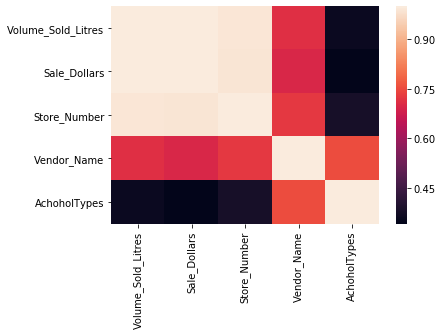

In [40]:
sns.heatmap(liquor_2016_county.corr())

Text(0.5, 1.0, 'Histogram for Volume_Sold_Litres')

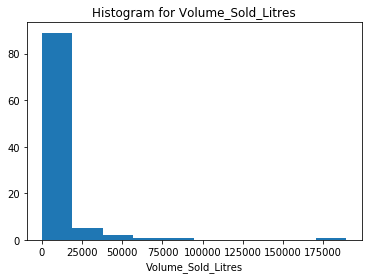

In [47]:
plt.hist(liquor_2016_county['Volume_Sold_Litres'])
plt.xlabel('Volume_Sold_Litres')
plt.title('Histogram for Volume_Sold_Litres')

Text(0.5, 1.0, 'Histogram for log of Volume_Sold_Litres')

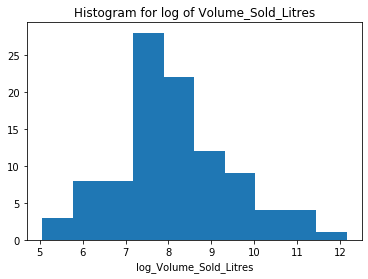

In [56]:
# Logarithmic transformation of Volume_Sold_Litres' to normalize data
plt.hist(numpy.log(liquor_2016_county['Volume_Sold_Litres']))
plt.xlabel('log_Volume_Sold_Litres')
plt.title('Histogram for log of Volume_Sold_Litres')

In [49]:
# Normalize the data
liquor_2016_county['log_Volume_Sold_Litres'] = numpy.log(liquor_2016_county['Volume_Sold_Litres'])

Text(0.5, 1.0, 'Histogram of Vendor_Name')

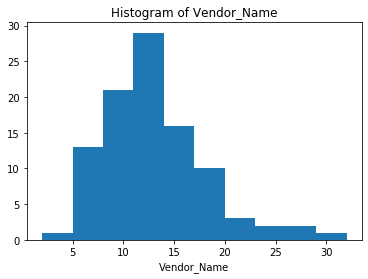

In [225]:
plt.hist(liquor_2016_county['Vendor_Name'])
plt.xlabel('Vendor_Name')
plt.title('Histogram of Vendor_Name')

Text(0.5, 1.0, 'Histogram of Alcohol Types')

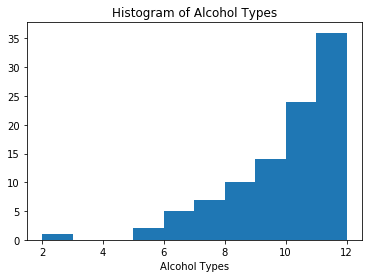

In [51]:
plt.hist((liquor_2016_county['AchoholTypes']))
plt.xlabel('Alcohol Types')
plt.title('Histogram of Alcohol Types')

In [52]:
#Normalize data
liquor_2016_county['AchoholTypes_norm'] = (liquor_2016_county['AchoholTypes']-numpy.mean(liquor_2016_county['AchoholTypes']))/numpy.std(liquor_2016_county['AchoholTypes'])

Text(0.5, 1.0, 'Histogram of Normalized Alcohol Types')

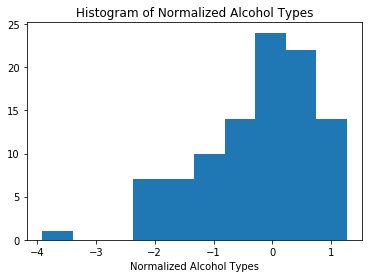

In [53]:
plt.hist(liquor_2016_county['AchoholTypes_norm'])
plt.xlabel('Normalized Alcohol Types')
plt.title('Histogram of Normalized Alcohol Types')

Text(0.5, 1.0, 'Boxplot of Vendor_Name')

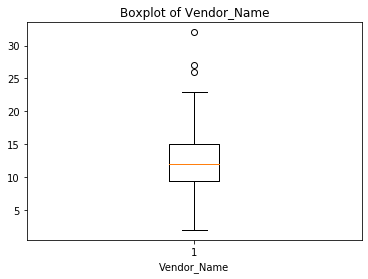

In [55]:
plt.boxplot(liquor_2016_county['Vendor_Name'])
plt.xlabel('Vendor_Name')
plt.title('Boxplot of Vendor_Name')


Text(0.5, 1.0, 'Boxplot for Volume_Sold_Litres')

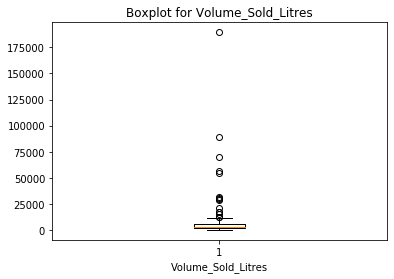

In [57]:
plt.boxplot(liquor_2016_county['Volume_Sold_Litres'])
plt.xlabel('Volume_Sold_Litres')
plt.title('Boxplot for Volume_Sold_Litres')

Text(0.5, 1.0, 'Histogram for log of Volume_Sold_Litres')

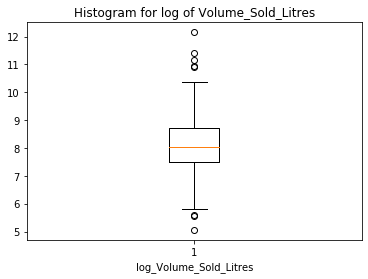

In [58]:
plt.boxplot(liquor_2016_county['log_Volume_Sold_Litres'])
plt.xlabel('log_Volume_Sold_Litres')
plt.title('Histogram for log of Volume_Sold_Litres')

Text(0.5, 1.0, 'Boxplot of Alcohol Types')

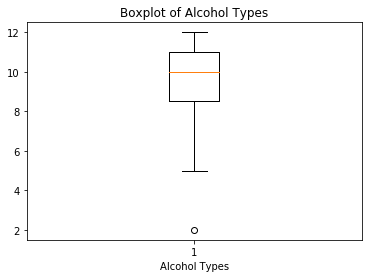

In [59]:
plt.boxplot(liquor_2016_county['AchoholTypes'])
plt.xlabel('Alcohol Types')
plt.title('Boxplot of Alcohol Types')

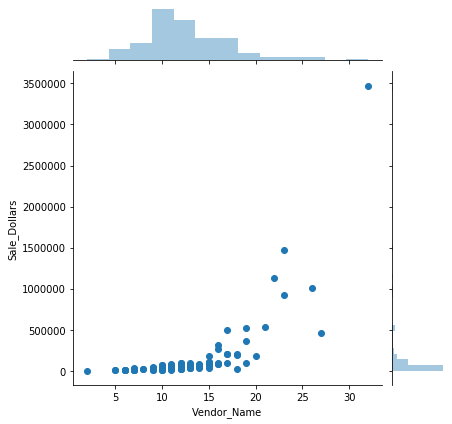

In [60]:

sns.jointplot(x=(liquor_2016_county['Vendor_Name']), y=liquor_2016_county['Sale_Dollars'],kind='scatter')
#plt.show()

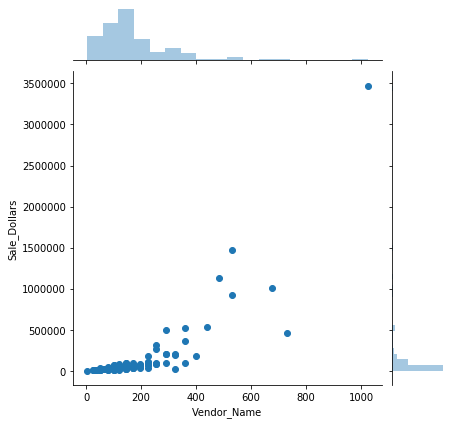

In [62]:

sns.jointplot(x=(liquor_2016_county['Vendor_Name'])**2, y=liquor_2016_county['Sale_Dollars'],kind='scatter')
#plt.show()

In [63]:
liquor_2016_county['Vendor_Name_square']=(liquor_2016_county['Vendor_Name'])**2

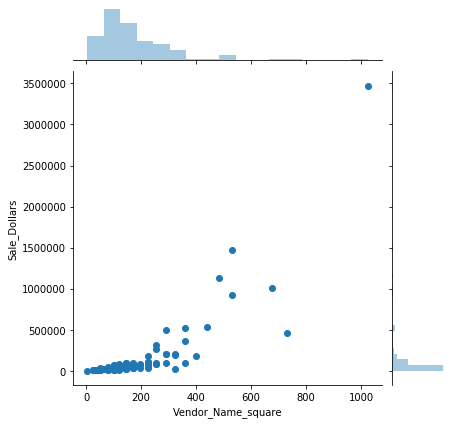

In [226]:

sns.jointplot(x=(liquor_2016_county['Vendor_Name_square']), y=liquor_2016_county['Sale_Dollars'],kind='scatter')
#plt.show()

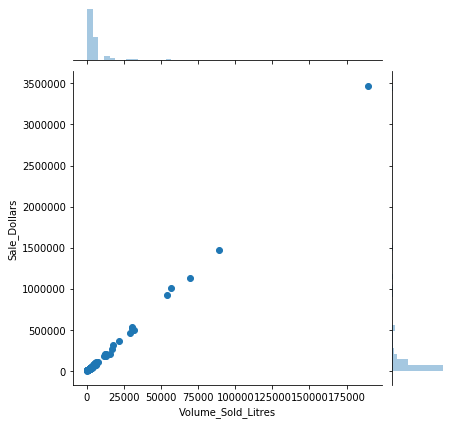

In [64]:

sns.jointplot(x=(liquor_2016_county['Volume_Sold_Litres']), y=liquor_2016_county['Sale_Dollars'],kind='scatter')
#plt.show()

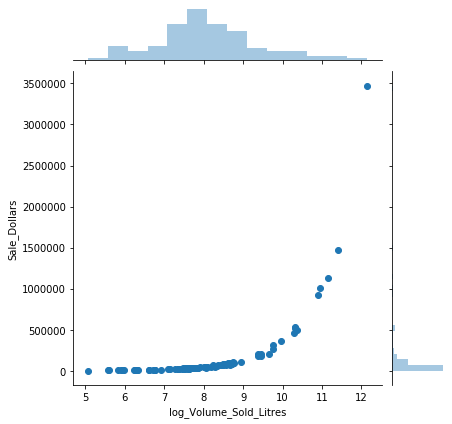

In [224]:

sns.jointplot(x=(liquor_2016_county['log_Volume_Sold_Litres']), y=liquor_2016_county['Sale_Dollars'],kind='scatter')
#plt.show()

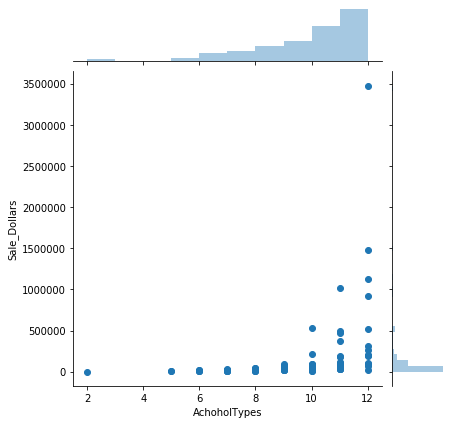

In [65]:

sns.jointplot(x=liquor_2016_county['AchoholTypes'], y=liquor_2016_county['Sale_Dollars'],kind='scatter')

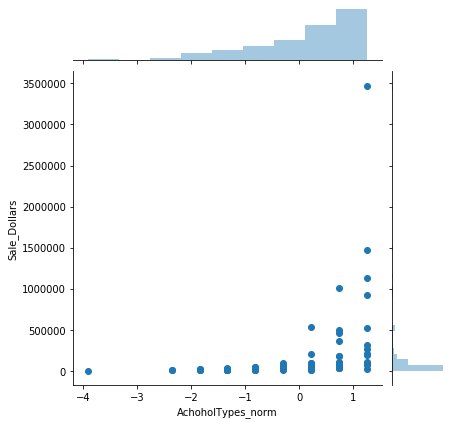

In [227]:

sns.jointplot(x=liquor_2016_county['AchoholTypes_norm'], y=liquor_2016_county['Sale_Dollars'],kind='scatter')

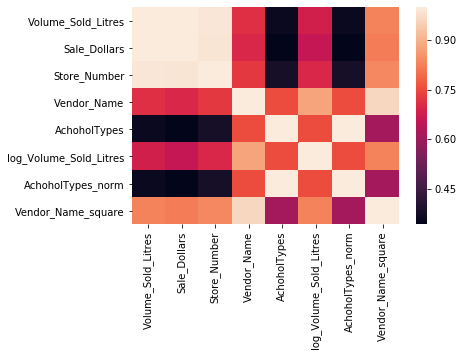

In [66]:
sns.heatmap(liquor_2016_county.corr())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
X = liquor_2016_county[['Vendor_Name','GDP_2016']]

X = add_constant(X)
pandas.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

In [ ]:
X = liquor_2016_county[['Vendor_Name','Volume_Sold_Litres','Vendor_Name_square','GDP_2016']]

X = add_constant(X)
pandas.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import scipy.stats as stats
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Model 1: Using only 'Volume_Sold_Litres' to predict 'Sale_Dollars'

In [68]:
dep = liquor_2016_county['Sale_Dollars']
indep = liquor_2016_county['Volume_Sold_Litres']
indep = sm.add_constant(indep)
model = sm.OLS(dep,indep)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Sale_Dollars   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.176e+04
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          7.26e-124
Time:                        21:27:46   Log-Likelihood:                -1133.3
No. Observations:                  99   AIC:                             2271.
Df Residuals:                      97   BIC:                             2276.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.279e+04   2491

C:\Users\shiva\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [69]:

X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size=0.3, random_state=1)

In [70]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(indep)
print(y_pred)

[ 3.38646814e+06  1.58211876e+06  1.23848618e+06  1.00260805e+06
  9.60348612e+05  5.57187508e+05  5.33040158e+05  5.28639492e+05
  5.08697734e+05  3.68299623e+05  2.97053346e+05  2.92720759e+05
  2.64805926e+05  2.12980850e+05  2.11735859e+05  2.02859444e+05
  1.98850543e+05  1.95568949e+05  1.23324129e+05  1.00661930e+05
  9.84746199e+04  9.79100543e+04  9.60342163e+04  9.53372661e+04
  9.49719061e+04  9.17745571e+04  8.96675400e+04  8.80376105e+04
  8.71657042e+04  8.47721830e+04  8.02691301e+04  7.98685633e+04
  7.88125400e+04  7.87766147e+04  7.52034874e+04  7.33572877e+04
  7.26678818e+04  7.03244765e+04  6.98452334e+04  6.88211835e+04
  6.23670291e+04  6.09530105e+04  5.64390003e+04  5.31493234e+04
  5.00848978e+04  4.43467341e+04  4.32145492e+04  4.29057715e+04
  4.18625016e+04  4.02070652e+04  3.89861449e+04  3.41006674e+04
  3.19119204e+04  3.13730413e+04  2.95848610e+04  2.77445890e+04
  2.76404057e+04  2.72816919e+04  2.70542850e+04  2.40556027e+04
  2.39262717e+04  2.35352

In [71]:

scores = cross_val_score(lm, X_test, y_test, cv=5)
print(scores)
print(numpy.mean(scores))

[0.99094385 0.99155328 0.9273191  0.99448108 0.99620616]
0.9801006950375118


0.9968788048074861
526173216.27265507
13416.351105025835
22938.465865716807


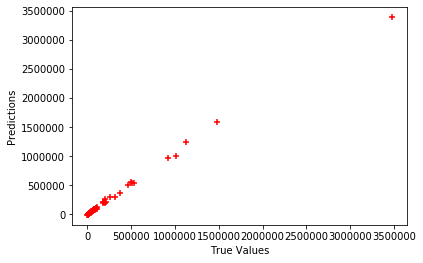

In [72]:
plt.scatter(dep, y_pred, marker='+', color='r')
plt.xlabel("True Values")
plt.ylabel("Predictions")
accuracy = metrics.r2_score(dep, y_pred)
mse= metrics.mean_squared_error(dep, y_pred)
mae=metrics.mean_absolute_error(dep,y_pred)
rmse=numpy.sqrt(metrics.mean_squared_error(dep, y_pred))
print(accuracy)
print(mse)
print(mae)
print(rmse)

# Model 2: Using 'Volume_Sold_Litres' and 'Vendor_Name' to predict 'Sale_Dollars'

In [73]:
dep = liquor_2016_county['Sale_Dollars']
indep = liquor_2016_county[['Volume_Sold_Litres','Vendor_Name']]
indep = sm.add_constant(indep)
model = sm.OLS(dep,indep)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Sale_Dollars   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.801e+04
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          2.40e-124
Time:                        21:33:24   Log-Likelihood:                -1126.5
No. Observations:                  99   AIC:                             2259.
Df Residuals:                      96   BIC:                             2267.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.307e+04   7305

C:\Users\shiva\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [74]:

X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size=0.3, random_state=1)

In [75]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(indep)
print(y_pred)

[ 3.40550093e+06  1.58641250e+06  1.23813974e+06  9.87044520e+05
  9.51600917e+05  5.55388051e+05  5.25599412e+05  5.15971637e+05
  4.80207187e+05  3.57403494e+05  2.92365058e+05  2.87941596e+05
  2.54306452e+05  2.03961764e+05  1.94988450e+05  1.91060661e+05
  1.89535078e+05  1.91319460e+05  1.17559327e+05  9.18543921e+04
  9.73234134e+04  9.16121998e+04  7.94274040e+04  9.66876577e+04
  9.63146344e+04  8.79154156e+04  9.60338172e+04  8.92348941e+04
  8.06424902e+04  7.30639594e+04  7.36012626e+04  7.06248909e+04
  7.72489274e+04  6.95100390e+04  7.86989824e+04  6.65444465e+04
  7.35427901e+04  7.62850389e+04  7.06609374e+04  7.21828117e+04
  5.78910738e+04  6.15822029e+04  5.95409160e+04  4.59126263e+04
  5.30535381e+04  3.94928085e+04  4.34716828e+04  4.57238318e+04
  4.20912765e+04  3.78337146e+04  4.42893954e+04  4.18688497e+04
  3.96341944e+04  2.88143997e+04  3.72583256e+04  3.28120514e+04
  2.50034733e+04  2.46372356e+04  3.21072684e+04  3.16130928e+04
  1.60766300e+04  2.59469

In [76]:
scores = cross_val_score(lm, X_test, y_test, cv=5)
print(scores)
print(numpy.mean(scores))

[0.99063537 0.99177886 0.92889381 0.99502902 0.99644301]
0.9805560130775515


0.997281258438978
458327308.33630466
11726.78040453686
21408.58025036468


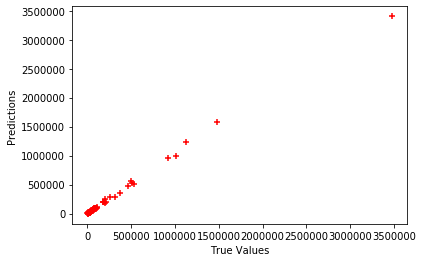

In [77]:
plt.scatter(dep, y_pred, marker='+', color='r')
plt.xlabel("True Values")
plt.ylabel("Predictions")
accuracy = metrics.r2_score(dep, y_pred)
mse= metrics.mean_squared_error(dep, y_pred)
mae=metrics.mean_absolute_error(dep,y_pred)
rmse=numpy.sqrt(metrics.mean_squared_error(dep, y_pred))
print(accuracy)
print(mse)
print(mae)
print(rmse)

# Model 3: Using 'Volume_Sold_Litres','Vendor_Name' and 'Vendor_Name_square' to predict 'Sale_Dollars'

In [78]:
dep = liquor_2016_county['Sale_Dollars']
indep = liquor_2016_county[['Volume_Sold_Litres','Vendor_Name','Vendor_Name_square']]
indep = sm.add_constant(indep)
model = sm.OLS(dep,indep)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Sale_Dollars   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.268e+04
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.68e-123
Time:                        21:34:52   Log-Likelihood:                -1123.3
No. Observations:                  99   AIC:                             2255.
Df Residuals:                      95   BIC:                             2265.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.078e+04   1.31

C:\Users\shiva\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size=0.3, random_state=1)

In [80]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(indep)
print(y_pred)

[ 3.40899005e+06  1.57147943e+06  1.22666277e+06  1.00094332e+06
  9.50755958e+05  5.44476797e+05  5.19828055e+05  5.16700373e+05
  5.11434613e+05  3.55364840e+05  2.85729416e+05  2.81404121e+05
  2.52090430e+05  2.00849567e+05  1.99471467e+05  1.90248227e+05
  1.86743047e+05  1.85816636e+05  1.13693431e+05  8.96685994e+04
  9.30430283e+04  8.83221375e+04  8.35577573e+04  9.26674499e+04
  9.23027050e+04  8.40496542e+04  9.38759691e+04  8.53800823e+04
  7.75958741e+04  7.28567237e+04  7.07109095e+04  6.89102357e+04
  7.34140470e+04  6.78201253e+04  7.57759623e+04  6.38107024e+04
  7.00362267e+04  7.45654672e+04  6.72183298e+04  6.94044022e+04
  5.46916301e+04  5.83410759e+04  5.70430629e+04  4.36367556e+04
  5.06996567e+04  3.67016700e+04  4.06324750e+04  4.35326155e+04
  3.92827035e+04  3.48735596e+04  4.32798898e+04  4.25148433e+04
  4.03297807e+04  2.60544066e+04  3.80066386e+04  3.20572576e+04
  2.23280545e+04  2.19699445e+04  3.13681156e+04  3.24866881e+04
  1.44628972e+04  2.41946

In [81]:
scores = cross_val_score(lm, X_test, y_test, cv=5)
print(scores)
print(numpy.mean(scores))

[0.99066072 0.98737262 0.9279001  0.99492686 0.99687631]
0.9795473203388447


0.9974340422033644
432570917.0365124
13011.736911346945
20798.339285541824


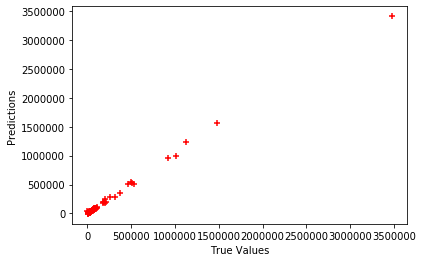

In [82]:
plt.scatter(dep, y_pred, marker='+', color='r')
plt.xlabel("True Values")
plt.ylabel("Predictions")
accuracy = metrics.r2_score(dep, y_pred)
mse= metrics.mean_squared_error(dep, y_pred)
mae=metrics.mean_absolute_error(dep,y_pred)
rmse=numpy.sqrt(metrics.mean_squared_error(dep, y_pred))
print(accuracy)
print(mse)
print(mae)
print(rmse)

# Model 4: Using 'log_Volume_Sold_Litres','Vendor_Name' and 'Vendor_Name_square' to predict 'Sale_Dollars'

In [83]:
dep = liquor_2016_county['Sale_Dollars']
indep = liquor_2016_county[['log_Volume_Sold_Litres','Vendor_Name','Vendor_Name_square']]
indep = sm.add_constant(indep)
model = sm.OLS(dep,indep)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Sale_Dollars   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     160.4
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           4.65e-37
Time:                        21:35:17   Log-Likelihood:                -1330.8
No. Observations:                  99   AIC:                             2670.
Df Residuals:                      95   BIC:                             2680.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.86

C:\Users\shiva\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Model 5: Using 'log_Volume_Sold_Litres' and 'Vendor_Name' to predict 'Sale_Dollars'

In [84]:
dep = liquor_2016_county['Sale_Dollars']
indep = liquor_2016_county[['log_Volume_Sold_Litres','Vendor_Name']]
indep = sm.add_constant(indep)
model = sm.OLS(dep,indep)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Sale_Dollars   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     47.21
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           5.27e-15
Time:                        21:35:25   Log-Likelihood:                -1386.2
No. Observations:                  99   AIC:                             2778.
Df Residuals:                      96   BIC:                             2786.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -8.92

# Model 6: Using 'Volume_Sold_Litres','Vendor_Name' and 'AcoholTypes' to predict 'Sale_Dollars'


In [85]:

dep = liquor_2016_county['Sale_Dollars']
indep = liquor_2016_county[['Volume_Sold_Litres','Vendor_Name','AchoholTypes']]
indep = sm.add_constant(indep)
model = sm.OLS(dep,indep)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           Sale_Dollars   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.93e-122
Time:                        21:35:45   Log-Likelihood:                -1125.9
No. Observations:                  99   AIC:                             2260.
Df Residuals:                      95   BIC:                             2270.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.326e+04   1.16

# Model 7: Using 'Volume_Sold_Litres','Vendor_Name', 'Vendor_Name_square' and 'AcoholTypes' to predict 'Sale_Dollars'


In [86]:
dep = liquor_2016_county['Sale_Dollars']
indep = liquor_2016_county[['Volume_Sold_Litres','Vendor_Name','Vendor_Name_square','AchoholTypes']]
indep = sm.add_constant(indep)
model = sm.OLS(dep,indep)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Sale_Dollars   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     9457.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.62e-121
Time:                        21:36:45   Log-Likelihood:                -1123.1
No. Observations:                  99   AIC:                             2256.
Df Residuals:                      94   BIC:                             2269.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.942e+04   1.33

In [89]:
iowa_gdp = pandas.read_csv('C:\\Users\\shiva\\Desktop\\DPA\\iowa_gdp.csv')
iowa_gdp.head()

,County,GDP_2015,GDP_2016,GDP_2017,GDP_2018,GDP_2019,GDP_2020
0,Adair,328347.0,315310.0,319374.0,324537.0,323267.00,327189.33
1,Adams,283787.0,302511.0,280320.0,296386.0,300585.67,295744.22
2,Allamakee,571989.0,593313.0,544488.0,541503.0,531341.00,520845.67
3,Appanoose,357330.0,359058.0,358792.0,348067.0,344979.33,343374.11
4,Audubon,245856.0,236395.0,249683.0,249566.0,250802.67,254368.56


In [88]:
liquor_2016_county=pandas.merge(liquor_2016_county,iowa_gdp[['County','GDP_2016']], on='County')

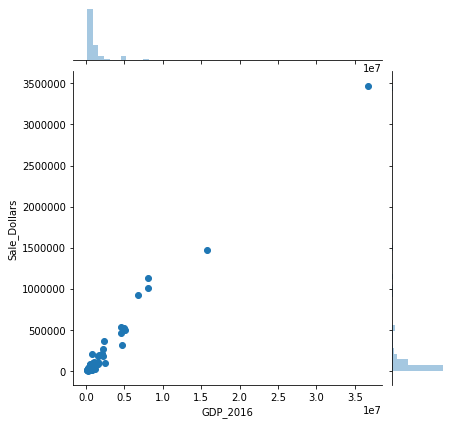

In [90]:

sns.jointplot(x=(liquor_2016_county['GDP_2016']), y=liquor_2016_county['Sale_Dollars'],kind='scatter')
#plt.show()

# Model 8: Using 'Volume_Sold_Litres','Vendor_Name' and 'GDP_2016' to predict 'Sale_Dollars'

In [92]:
dep = liquor_2016_county['Sale_Dollars']
indep = liquor_2016_county[['GDP_2016','Vendor_Name','Volume_Sold_Litres']]
indep = sm.add_constant(indep)
model = sm.OLS(dep,indep)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Sale_Dollars   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.940e+04
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          4.42e-131
Time:                        21:52:06   Log-Likelihood:                -1091.1
No. Observations:                  98   AIC:                             2190.
Df Residuals:                      94   BIC:                             2201.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3548.8874   6135

# Model 9: Using 'Volume_Sold_Litres','Vendor_Name','Vendor_Name_square' and 'GDP_2016' to predict 'Sale_Dollars'

In [203]:
dep = liquor_2016_county['Sale_Dollars']
indep = liquor_2016_county[['GDP_2016','Vendor_Name','Volume_Sold_Litres','Vendor_Name_square']]
indep = sm.add_constant(indep)
model = sm.OLS(dep,indep)
results = model.fit()
print(results.summary())numpy.sum(new_y_pred)

                            OLS Regression Results                            
Dep. Variable:           Sale_Dollars   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.575e+04
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.03e-130
Time:                        02:03:34   Log-Likelihood:                -1086.7
No. Observations:                  98   AIC:                             2183.
Df Residuals:                      93   BIC:                             2196.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.195e+04   1.05

C:\Users\shiva\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [204]:
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size=0.3, random_state=1)

In [205]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(indep)
print(y_pred)

[ 3.43514300e+06  1.56347040e+06  1.15887619e+06  9.77048683e+05
  9.11137774e+05  5.34978201e+05  5.15024357e+05  5.10599562e+05
  5.17860664e+05  3.39239113e+05  3.11808184e+05  2.70520627e+05
  2.46829253e+05  1.84260483e+05  2.08436611e+05  1.88314051e+05
  1.91410119e+05  1.80136508e+05  1.10923415e+05  9.33066378e+04
  9.08498682e+04  9.81558657e+04  9.75419015e+04  8.45469843e+04
  1.11469074e+05  8.60384867e+04  8.44005589e+04  8.88568859e+04
  7.89614422e+04  7.80734124e+04  7.46613039e+04  7.06546979e+04
  6.84783964e+04  7.41634581e+04  8.47449021e+04  7.48086130e+04
  6.43016066e+04  6.95964729e+04  6.79138055e+04  7.16429143e+04
  5.59479386e+04  5.61904078e+04  5.13374236e+04  4.64725850e+04
  4.86307516e+04  4.18376348e+04  4.48481316e+04  4.61045387e+04
  3.85847677e+04  4.45428414e+04  4.49604547e+04  3.61568231e+04
  2.76894848e+04  3.60290221e+04  3.10474733e+04  2.31334699e+04
  2.27193765e+04  3.27596376e+04  3.53940762e+04  2.44516073e+04
  2.52123221e+04  2.05343

In [206]:
scores = cross_val_score(lm, X_test, y_test, cv=5)
print(scores)
print(numpy.mean(scores))

[0.99643734 0.9501046  0.62323918 0.9948459  0.97313578]
0.9075525608737989


0.9984512404540846
263561830.56326795
10083.794440599324
16234.587477458981


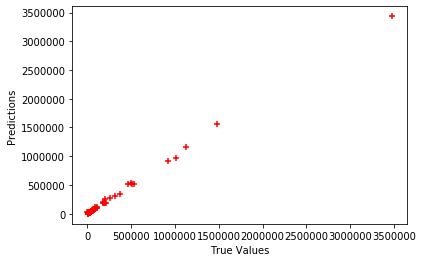

In [207]:
plt.scatter(dep, y_pred, marker='+', color='r')
plt.xlabel("True Values")
plt.ylabel("Predictions")
accuracy = metrics.r2_score(dep, y_pred)
mse= metrics.mean_squared_error(dep, y_pred)
mae=metrics.mean_absolute_error(dep,y_pred)
rmse=numpy.sqrt(metrics.mean_squared_error(dep, y_pred))
print(accuracy)
print(mse)
print(mae)
print(rmse)

In [208]:
# Annual Predicted Sales for 2016
numpy.sum(new_y_pred)

15551572.085220024

In [114]:
# Error for Annual Predicted Sales for 2016
Percent_Prediction_Error = (numpy.sum(liquor_2016_county['Sale_Dollars'])- numpy.sum(y_pred))/numpy.sum(liquor_2016_county['Sale_Dollars'])*100
print(Percent_Prediction_Error)

0.14529416344275237


In [115]:
# Get county wise sales for 017
liquor_2017 = liquor[liquor['Year']==2017]

In [116]:
liquor_2017_County_volume = liquor_2017.groupby(['County'])['Volume_Sold_Litres'].sum().to_frame().sort_values('Volume_Sold_Litres', ascending=0)

# resetting the index
liquor_2017_County_volume['County'] = liquor_2017_County_volume.index

liquor_2017_County_volume.index = range(0, len(liquor_2017_County_volume))

In [117]:
liquor_2017_County_sales = liquor_2017.groupby(['County'])['Sale_Dollars'].sum().to_frame().sort_values('Sale_Dollars', ascending=0)

# resetting the index
liquor_2017_County_sales['County'] = liquor_2017_County_sales.index

liquor_2017_County_sales.index = range(0, len(liquor_2017_County_sales))

In [118]:
liquor_2017_County_Brand_count = liquor_2017.groupby(['County'])['Vendor_Name'].nunique().to_frame().sort_values('Vendor_Name', ascending=0)

# resetting the index
liquor_2017_County_Brand_count['County'] = liquor_2017_County_Brand_count.index

liquor_2017_County_Brand_count.index = range(0, len(liquor_2017_County_Brand_count))

In [119]:
liquor_2017_county = pandas.merge(liquor_2017_County_volume, liquor_2017_County_sales, how='inner', on='County')
liquor_2017_county = pandas.merge(liquor_2017_county, liquor_2017_County_Brand_count, how='inner', on='County')
liquor_2017_county.head()

,Volume_Sold_Litres,County,Sale_Dollars,Vendor_Name
0,197837.64,Polk,3.634993e+06,30
1,90265.34,Linn,1.489447e+06,23
2,68391.68,Scott,1.099537e+06,19
3,53542.03,Johnson,9.315255e+05,27
4,52405.00,Black Hawk,9.024242e+05,20


In [120]:
liquor_2017_county['Vendor_Name_square']= liquor_2017_county['Vendor_Name']**2


In [122]:
liquor_2017_county=pandas.merge(liquor_2017_county,iowa_gdp[['County','GDP_2017']], on='County')

In [123]:
liquor_2017_county.head()

,Volume_Sold_Litres,County,Sale_Dollars,Vendor_Name,Vendor_Name_square,GDP_2017
0,197837.64,Polk,3.634993e+06,30,900,36211368.0
1,90265.34,Linn,1.489447e+06,23,529,15560368.0
2,68391.68,Scott,1.099537e+06,19,361,8012364.0
3,53542.03,Johnson,9.315255e+05,27,729,8281109.0
4,52405.00,Black Hawk,9.024242e+05,20,400,6895327.0


In [124]:
new_dep=liquor_2017_county['Sale_Dollars']
new_indep = liquor_2017_county[['Volume_Sold_Litres','Vendor_Name','Vendor_Name_square','GDP_2017']]
new_indep = sm.add_constant(new_indep)

C:\Users\shiva\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [126]:
#from Model 9
b_const    =           2.195e+04   
b_GDP_2016  =             0.0182      
b_Vendor_Name =       -5284.1783   
b_Volume_Sold_Litres =   14.3785      
b_Vendor_Name_square =  183.3476

In [209]:
# Predict sales for 2017
new_y_pred =b_const + b_GDP_2016*liquor_2017_county['GDP_2017'] + b_Vendor_Name*liquor_2017_county['Vendor_Name'] + b_Volume_Sold_Litres*liquor_2017_county['Volume_Sold_Litres'] + b_Vendor_Name_square*liquor_2017_county['Vendor_Name_square'] 

In [210]:
# Annual Predicted Sales for 2017
numpy.sum(new_y_pred)

15551572.085220024

In [145]:
# Accuracy for Annual Predicted Sales for 2017
accuracy=metrics.r2_score(liquor_2017_county['Sale_Dollars'], new_y_pred)
print(accuracy)

0.9979246459725376


In [146]:
# Error for Annual Predicted Sales for 2017
Percent_Prediction_Error=(numpy.sum(liquor_2017_county['Sale_Dollars'])-numpy.sum(new_y_pred))/numpy.sum(liquor_2017_county['Sale_Dollars']) * 100
print(Percent_Prediction_Error)

-0.19983887987346863


In [139]:
#Get County wise Data for 2018

liquor_2018 = liquor[liquor['Year']==2018]
liquor_2018_County_volume = liquor_2018.groupby(['County'])['Volume_Sold_Litres'].sum().to_frame().sort_values('Volume_Sold_Litres', ascending=0)

# resetting the index
liquor_2018_County_volume['County'] = liquor_2018_County_volume.index

liquor_2018_County_volume.index = range(0, len(liquor_2018_County_volume))


liquor_2018_County_Brand_count = liquor_2018.groupby(['County'])['Vendor_Name'].nunique().to_frame().sort_values('Vendor_Name', ascending=0)

# resetting the index
liquor_2018_County_Brand_count['County'] = liquor_2018_County_Brand_count.index

liquor_2018_County_Brand_count.index = range(0, len(liquor_2018_County_Brand_count))


liquor_2018_County_sales = liquor_2018.groupby(['County'])['Sale_Dollars'].sum().to_frame().sort_values('Sale_Dollars', ascending=0)

# resetting the index
liquor_2018_County_sales['County'] = liquor_2018_County_sales.index

liquor_2018_County_sales.index = range(0, len(liquor_2018_County_sales))


liquor_2018_county = pandas.merge(liquor_2018_County_volume, liquor_2018_County_sales, how='inner', on='County')
liquor_2018_county = pandas.merge(liquor_2018_county, liquor_2018_County_Brand_count, how='inner', on='County')
liquor_2018_county=pandas.merge(liquor_2018_county,iowa_gdp[['County','GDP_2018']], on='County')


liquor_2018_county['Vendor_Name_square']= liquor_2018_county['Vendor_Name']**2
liquor_2018_county.head()


,Volume_Sold_Litres,County,Sale_Dollars,Vendor_Name,GDP_2018,Vendor_Name_square
0,222781.02,Polk,4.133026e+06,32,36757721.0,1024
1,93096.93,Linn,1.527635e+06,23,15957005.0,529
2,79805.41,Scott,1.311990e+06,22,8208858.0,484
3,65739.73,Black Hawk,1.135416e+06,25,7115887.0,625
4,57405.36,Johnson,9.962057e+05,27,8385942.0,729


In [199]:
# Predict 2018 sales
new_y_pred =b_const + b_GDP_2016*liquor_2018_county['GDP_2018'] + b_Vendor_Name*liquor_2018_county['Vendor_Name'] + b_Volume_Sold_Litres*liquor_2018_county['Volume_Sold_Litres'] + b_Vendor_Name_square*liquor_2018_county['Vendor_Name_square']


In [200]:
# Annual Predicted Sales 2018
numpy.sum(new_y_pred)

17113306.575035036

In [150]:
# Accuracy for Annual Predicted Sales 2018 
accuracy = metrics.r2_score(liquor_2018_county['Sale_Dollars'], new_y_pred)
print(accuracy)

0.9966757409195505


In [151]:
# Error for Annual Predicted Sales 2018
Percent_Prediction_Error=(numpy.sum(liquor_2018_county['Sale_Dollars'])-numpy.sum(new_y_pred))/numpy.sum(liquor_2018_county['Sale_Dollars']) * 100
print(Percent_Prediction_Error)

0.827429947241557


In [152]:
# Get County wise data for 2019

liquor_2019 = liquor[liquor['Year']==2019]
liquor_2019_County_volume = liquor_2019.groupby(['County'])['Volume_Sold_Litres'].sum().to_frame().sort_values('Volume_Sold_Litres', ascending=0)

# resetting the index
liquor_2019_County_volume['County'] = liquor_2019_County_volume.index

liquor_2019_County_volume.index = range(0, len(liquor_2019_County_volume))


liquor_2019_County_Brand_count = liquor_2019.groupby(['County'])['Vendor_Name'].nunique().to_frame().sort_values('Vendor_Name', ascending=0)

# resetting the index
liquor_2019_County_Brand_count['County'] = liquor_2019_County_Brand_count.index

liquor_2019_County_Brand_count.index = range(0, len(liquor_2019_County_Brand_count))


liquor_2019_County_sales = liquor_2019.groupby(['County'])['Sale_Dollars'].sum().to_frame().sort_values('Sale_Dollars', ascending=0)

# resetting the index
liquor_2019_County_sales['County'] = liquor_2019_County_sales.index

liquor_2019_County_sales.index = range(0, len(liquor_2019_County_sales))


liquor_2019_county = pandas.merge(liquor_2019_County_volume, liquor_2019_County_sales, how='inner', on='County')
liquor_2019_county = pandas.merge(liquor_2019_county, liquor_2019_County_Brand_count, how='inner', on='County')
liquor_2019_county=pandas.merge(liquor_2019_county,iowa_gdp[['County','GDP_2019']], on='County')


liquor_2019_county['Vendor_Name_square']= liquor_2019_county['Vendor_Name']**2
liquor_2019_county.head()


,Volume_Sold_Litres,County,Sale_Dollars,Vendor_Name,GDP_2019,Vendor_Name_square
0,207857.09,Polk,3895269.74,29,37111383.33,841
1,85981.71,Linn,1410013.17,23,16086374.33,529
2,71881.51,Scott,1196337.81,21,8225066.67,441
3,63262.73,Black Hawk,1114204.78,20,6999011.67,400
4,43626.93,Johnson,789579.03,24,8506429.67,576


In [197]:
# Predict 2019 sales

new_y_pred =b_const + b_GDP_2016*liquor_2019_county['GDP_2019'] + b_Vendor_Name*liquor_2019_county['Vendor_Name'] + b_Volume_Sold_Litres*liquor_2019_county['Volume_Sold_Litres'] + b_Vendor_Name_square*liquor_2019_county['Vendor_Name_square']


In [198]:
# Annual Predicted 2019 sales
numpy.sum(new_y_pred)

16074694.356256025

In [154]:
# Accuracy for Annual Predicted 2019 sales
accuracy = metrics.r2_score(liquor_2019_county['Sale_Dollars'], new_y_pred)
print(accuracy)

0.9960771167935109


In [155]:
# Error for Annual Predicted 2019 sales
Percent_Prediction_Error=(numpy.sum(liquor_2019_county['Sale_Dollars'])-numpy.sum(new_y_pred))/numpy.sum(liquor_2019_county['Sale_Dollars']) * 100
print(Percent_Prediction_Error) 

0.8994280842784036


In [156]:
# Get County wise data for 2020 

liquor_2020 = liquor[liquor['Year']==2020]
liquor_2020_County_volume = liquor_2020.groupby(['County'])['Volume_Sold_Litres'].sum().to_frame().sort_values('Volume_Sold_Litres', ascending=0)

# resetting the index
liquor_2020_County_volume['County'] = liquor_2020_County_volume.index

liquor_2020_County_volume.index = range(0, len(liquor_2020_County_volume))


liquor_2020_County_Brand_count = liquor_2020.groupby(['County'])['Vendor_Name'].nunique().to_frame().sort_values('Vendor_Name', ascending=0)

# resetting the index
liquor_2020_County_Brand_count['County'] = liquor_2020_County_Brand_count.index

liquor_2020_County_Brand_count.index = range(0, len(liquor_2020_County_Brand_count))


liquor_2020_County_sales = liquor_2020.groupby(['County'])['Sale_Dollars'].sum().to_frame().sort_values('Sale_Dollars', ascending=0)

# resetting the index
liquor_2020_County_sales['County'] = liquor_2020_County_sales.index

liquor_2020_County_sales.index = range(0, len(liquor_2020_County_sales))


liquor_2020_county = pandas.merge(liquor_2020_County_volume, liquor_2020_County_sales, how='inner', on='County')
liquor_2020_county = pandas.merge(liquor_2020_county, liquor_2020_County_Brand_count, how='inner', on='County')
liquor_2020_county=pandas.merge(liquor_2020_county,iowa_gdp[['County','GDP_2020']], on='County')


liquor_2020_county['Vendor_Name_square']= liquor_2020_county['Vendor_Name']**2
liquor_2020_county.head()






,Volume_Sold_Litres,County,Sale_Dollars,Vendor_Name,GDP_2020,Vendor_Name_square
0,13335.36,Polk,245050.34,15,36898664.78,225
1,6593.87,Linn,104595.08,14,16074627.44,196
2,4209.96,Scott,64705.20,14,8266545.89,196
3,3243.97,Black Hawk,51743.43,15,7170397.56,225
4,3098.04,Pottawattamie,55952.57,15,4655599.33,225


In [190]:
# Predict Sales for 2020
new_y_pred =b_const + b_GDP_2016*((liquor_2020_county['GDP_2020'])) + b_Vendor_Name*liquor_2019_county['Vendor_Name'] + b_Volume_Sold_Litres*liquor_2019_county['Volume_Sold_Litres'] + b_Vendor_Name_square*liquor_2019_county['Vendor_Name_square']

In [191]:
# Annual predicted Sales for2020
numpy.sum(new_y_pred)

16083943.895100024

In [157]:
# Annual sales for 2020
numpy.sum(liquor_2020_county['Sale_Dollars'])

1061760.7200000023

In [193]:
# Annual sales for 2019
numpy.sum(liquor_2019_county['Sale_Dollars'])

16220586.869999576

In [187]:
# Annual sales for 2018
numpy.sum(liquor_2018_county['Sale_Dollars'])

17256088.619999453

In [195]:
# Annual sales for 2017
numpy.sum(liquor_2017_county['Sale_Dollars'])

15520555.979999458

In [196]:
# Annual sales for 2016
numpy.sum(liquor_2016_county['Sale_Dollars'])

15562198.71999944

In [5]:
models = pandas.read_csv('C:\\Users\\shiva\\Desktop\\DPA\\Model.csv')
models.head()

,Model,Mean absolute Error,Root Mean Squared Error
0,Model 1,13416.35,22938.47
1,Model 2,11726.78,21408.58
2,Model 3,13011.74,20798.34
3,Model 9,10083.79,16234.59


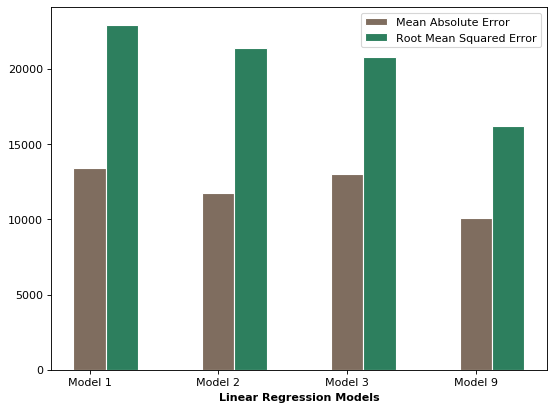

In [7]:
# Model comparison
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# set width of bar
barWidth = 0.25
 
# set height of bar
#bars1 = models['Mean Squared Error']
bars2 = models['Mean absolute Error']
bars3 = models['Root Mean Squared Error']
 
# Set position of bar on X axis
r1 = numpy.arange(len(bars2))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
#plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Mean Squared Error')
plt.bar(r2, bars2, color='#7f6d5f', width=barWidth, edgecolor='white', label='Mean Absolute Error')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Root Mean Squared Error')
 
# Add xticks on the middle of the group bars
plt.xlabel('Linear Regression Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars2))], ['Model 1', 'Model 2', 'Model 3', 'Model 9'])


# Create legend & Show graphic
plt.legend()
plt.show()
